In [5]:
import pandas as pd
from prophet import Prophet

# Load the CSV file into a DataFrame
all_data = pd.read_csv('stock_data.csv')

# Display the DataFrame to verify it has been imported correctly
all_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2013-04-01,21.670000,21.700001,21.320000,21.430000,15.651334,33718100,INTC
1,2013-04-02,21.520000,21.580000,21.320000,21.459999,15.673239,28166700,INTC
2,2013-04-03,21.450001,21.500000,21.010000,21.049999,15.373801,36620800,INTC
3,2013-04-04,21.049999,21.190001,20.959999,21.139999,15.439535,28702500,INTC
4,2013-04-05,20.940001,20.969999,20.750000,20.940001,15.293467,36721600,INTC
...,...,...,...,...,...,...,...,...
10063,2023-03-22,143.600006,147.416672,142.133331,142.169998,138.068573,3313200,SOXX
10064,2023-03-23,144.276672,147.630005,143.133331,145.676666,142.548950,4039800,SOXX
10065,2023-03-24,144.496674,144.889999,141.699997,143.149994,140.076523,3120600,SOXX
10066,2023-03-27,143.666672,144.106674,140.973328,141.470001,138.432602,1806300,SOXX


In [6]:
import yfinance as yf

# Ticker symbol for AMD
soxx_symbol = 'SOXX'

# Fetch SOXX ETF data for the past 11 years
soxx_data = yf.download(soxx_symbol, period='11y')

soxx_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-21,227.369995,229.279999,224.759995,225.179993,225.179993,4059800
2024-03-22,224.160004,227.100006,223.449997,225.449997,225.449997,2658100
2024-03-25,222.250000,226.610001,221.710007,224.570007,224.570007,2283500
2024-03-26,226.190002,226.880005,222.830002,222.880005,222.880005,4414200
2024-03-27,225.389999,225.759995,221.399994,225.679993,225.679993,4161300


[*********************100%%**********************]  1 of 1 completed


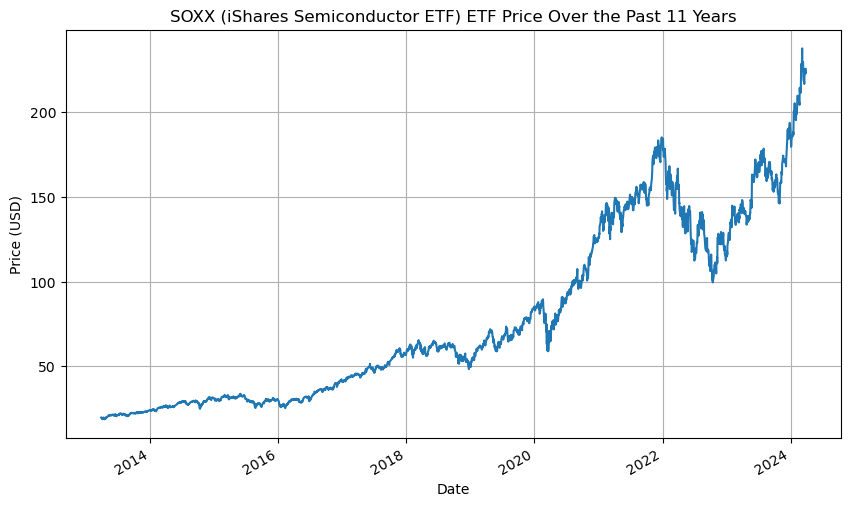

In [7]:
import matplotlib.pyplot as plt

# Ticker symbol for SOXX ETF
soxx_symbol = 'SOXX'

# Fetch SOXX ETF data for the past 11 years
amd_data = yf.download(soxx_symbol, period='11y')

# Plot the 'Close' price
plt.figure(figsize=(10, 6))
soxx_data['Close'].plot()
plt.title('SOXX (iShares Semiconductor ETF) ETF Price Over the Past 11 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [8]:
# Filter the data for SOXX
soxx_data = all_data[all_data['Ticker'] == 'SOXX']

# Prophet expects the 'Date' and 'Close' columns
soxx_data = soxx_data[['Date', 'Close']]
soxx_data.columns = ['ds', 'y']  # Renaming columns for Prophet

# Create a Prophet model for SOXX
model_soxx = Prophet()

# Fit the model
model_soxx.fit(soxx_data)

# Make a future dataframe for one year past the last available date
future_soxx = model_soxx.make_future_dataframe(periods=365)

# Forecast
forecast_soxx= model_soxx.predict(future_soxx)

# Print the forecast
forecast_soxx[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

18:52:37 - cmdstanpy - INFO - Chain [1] start processing
18:52:37 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2877,2024-03-23,113.648300,98.157632,130.324333
2878,2024-03-24,113.626085,95.922036,131.025172
2879,2024-03-25,114.352646,98.058227,131.444057
2880,2024-03-26,114.318088,98.254599,131.321385
2881,2024-03-27,114.239937,96.853463,131.688858


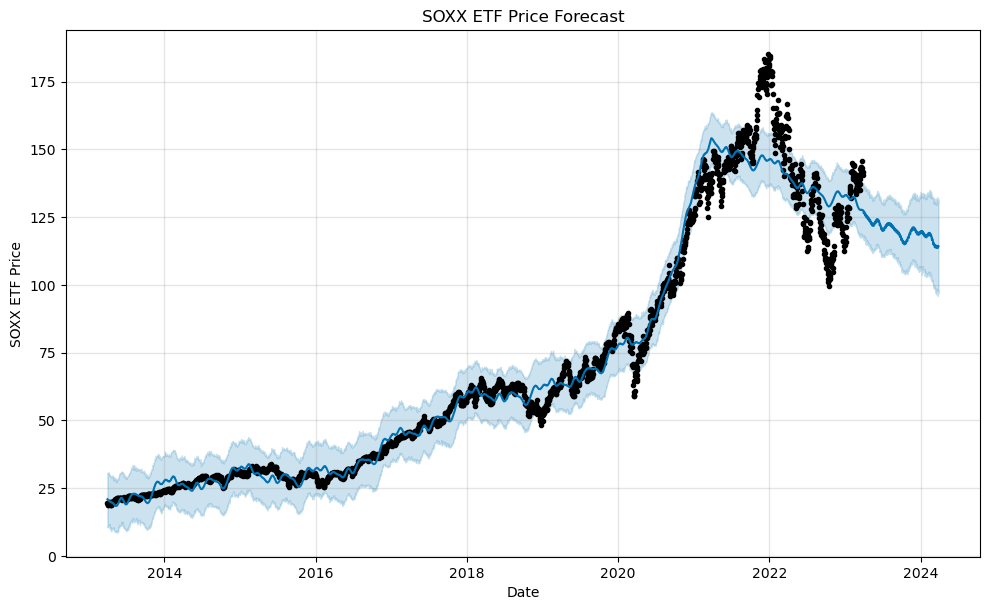

In [9]:
import matplotlib.pyplot as plt

# Plot the forecast for AMD
fig_soxx = model_soxx.plot(forecast_soxx)
plt.xlabel('Date')
plt.ylabel('SOXX ETF Price')
plt.title('SOXX ETF Price Forecast')
plt.show()

[*********************100%%**********************]  1 of 1 completed


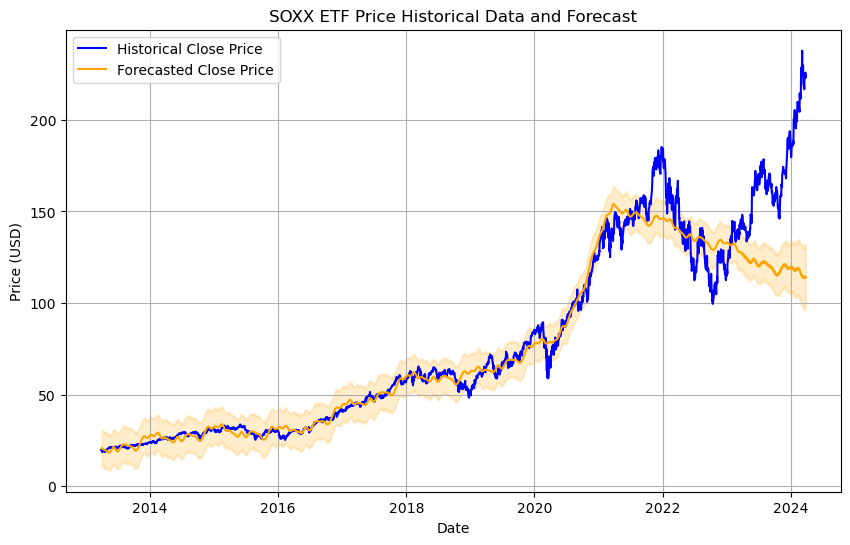

In [10]:
# Ticker symbol for SOXX
soxx_symbol = 'SOXX'

# Fetch SOXX stock data for the past 11 years
soxx_data = yf.download(soxx_symbol, period='11y')

# Plot both historical data and forecast for SOXX
plt.figure(figsize=(10, 6))

# Plot historical data for SOXX
plt.plot(soxx_data.index, soxx_data['Close'], label='Historical Close Price', color='blue')

# Plot forecast for SOXX
plt.plot(forecast_soxx['ds'], forecast_soxx['yhat'], label='Forecasted Close Price', color='orange')
plt.fill_between(forecast_soxx['ds'], forecast_soxx['yhat_lower'], forecast_soxx['yhat_upper'], color='orange', alpha=0.2)

plt.title('SOXX ETF Price Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()